In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import cm

from PIL import Image

<div style="text-align: center;">
    <span style="color: red; font-size: 70px;"> Esperienza 0 </span>
</div>

<div style="text-align: center;">
    <span style="color: blue; font-size: 50px;"> Studio delle immagini </span>
</div>

In [5]:
col = 1224
row = 1024

<center>

### Analisi del rumore medio

</center>

In [6]:
appo = 0
mean_noise = 0

for i in range(1, 81):
    path = "Dati/CAMimages/dark2x2/dark" + "{:03d}".format(i) + ".tif"
    mean_noise = mean_noise * i/(i+1) + np.array(Image.open(path))/(i+1)

del appo
del path

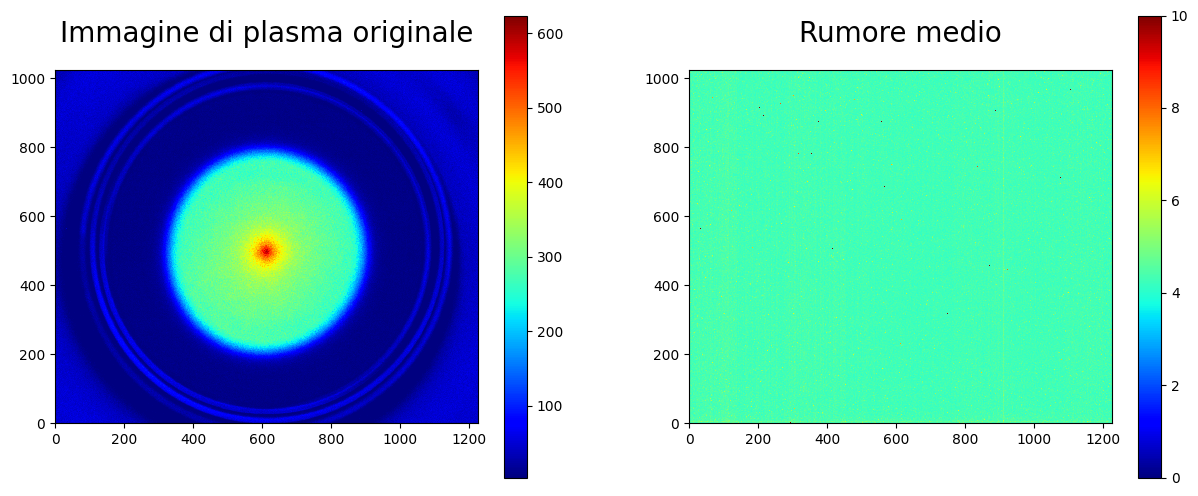

In [7]:
fig = plt.figure(figsize=(15, 6))

# Creo la griglia per gli output
x = np.linspace(0, col, col)
y = np.linspace(0, row, row)
X, Y = np.meshgrid(x, y)


#--------------------------------------------------#
#                 Plasma originale                 #
#--------------------------------------------------#
ax = fig.add_subplot(1, 2, 1)
inte = np.array(Image.open("Dati/CAMimages/plasma/plasma001.tif"))

# Faccio plot
cax = ax.pcolormesh(X, Y, inte, cmap='jet')
plt.colorbar(cax); ax.set_aspect('equal')
ax.set_title(f'Immagine di plasma originale', fontsize = 20, pad=20)


#--------------------------------------------------#
#              Calcolo rumore medio                #
#--------------------------------------------------#
ax = fig.add_subplot(1, 2, 2)
cax = ax.pcolormesh(X, Y, mean_noise, cmap='jet', vmin = 0, vmax = 10)
plt.colorbar(cax); ax.set_aspect('equal')
ax.set_title(f'Rumore medio', fontsize = 20, pad=20)

plt.show()

del inte
del x, y, X, Y

<center>

### Dimensioni della trappola

</center>

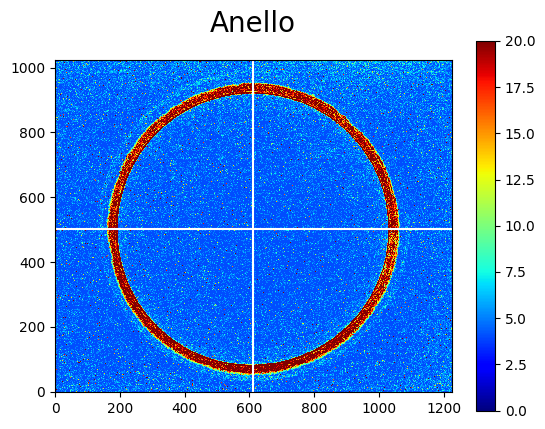

In [8]:
# Creo la griglia per gli output
x = np.linspace(0, col, col)
y = np.linspace(0, row, row)
X, Y = np.meshgrid(x, y)

ring = np.array(Image.open("Dati/CAMimages/ring2x2/ring1.tif"))

cax = plt.pcolormesh(X, Y, ring, cmap='jet', vmin = 0, vmax = 20)
plt.colorbar(cax); plt.gca().set_aspect('equal')
plt.title(f'Anello', fontsize = 20, pad=20)

plt.axhline(y=502, color='w', linestyle='-')
plt.axvline(x=612, color='w', linestyle='-')

plt.show()

del ring
del x, y, X, Y

Posso ora centrare le immagini in modo tale da effettuare dei controlli riguardo la dimensione della trappola: non ha senso che i pixel esterni si trovino ad un'intensità non nulla, poichè la loro influenza all'intensità totale è solo rumore. Il centro si trova in:
$$\left(x_c,\,y_c\right)\,=\,\left(612,\,502\right)$$

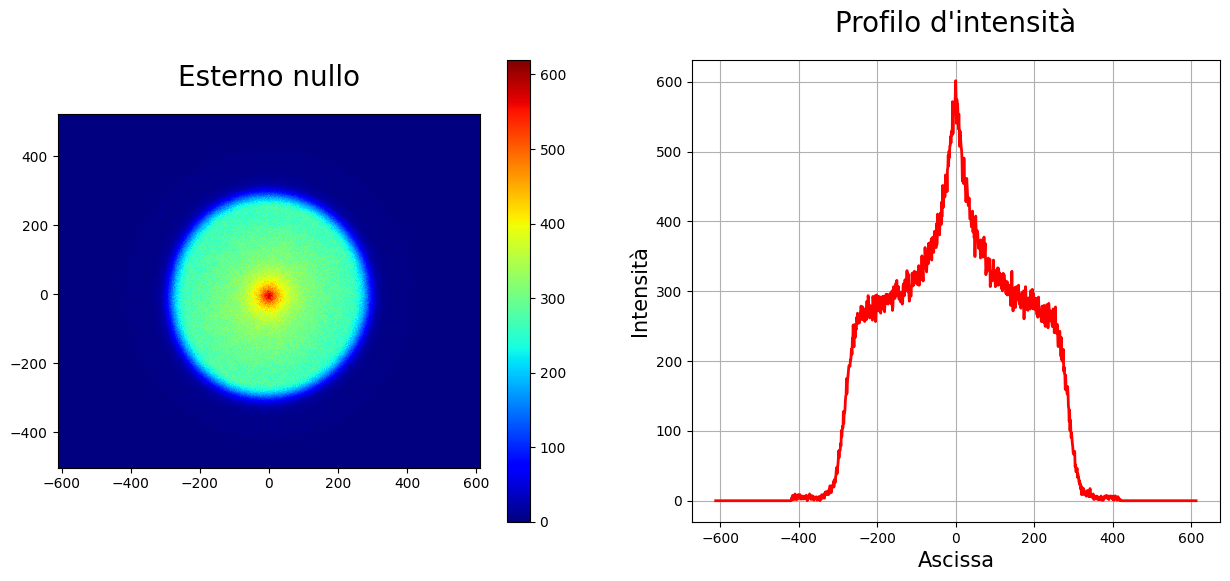

In [9]:
fig = plt.figure(figsize=(15, 6))

x = np.linspace(-col/2, col/2, col)
y = np.linspace(-row/2 + 10, row/2 + 10, row)

X, Y = np.meshgrid(x, y)

#-------------------------------------------------------------#
#              Immagine di plasma: esterno nullo              #
#-------------------------------------------------------------# 
ax = fig.add_subplot(1, 2, 1)
plasma = np.array(Image.open("Dati/CAMimages/plasma/plasma001.tif"))
plasma = plasma - mean_noise

mask = plasma < 0
plasma[mask] = 0

mask = (X*X + Y*Y) > pow(419, 2)
plasma[mask] = 0

# Faccio plot
cax = ax.pcolormesh(X, Y, plasma, cmap='jet')
plt.colorbar(cax); ax.set_aspect('equal')
ax.set_title(f'Esterno nullo', fontsize = 20, pad=20)


#-------------------------------------------------------------#
#                      Profilo d'intensità                    #
#-------------------------------------------------------------# 
ax = fig.add_subplot(1, 2, 2)
plasma = plasma.reshape(1024, 1224)
prof = plasma[502,:]

ax.plot(x, prof, color = 'r', linestyle = '-',linewidth = 2)
ax.set_xlabel("Ascissa", fontsize = 15); ax.set_ylabel("Intensità", fontsize = 15); ax.grid(True)
ax.set_title(f"Profilo d'intensità", fontsize = 20, pad=20)

plt.show()
del x, y, X, Y
del prof, plasma, mask

<center>

### Riflessioni

<center>

Vogliamo togliere le riflessioni che causano un rumore non nullo nella regione della trappola in cui non è presente il plasma: per fare questo mediamo l'intensità sulla corona circolare presente fra raggio di plasma e parete della trappola in modo tale da poterla sottrare ed ottenere un'immagine finalmente pulita.

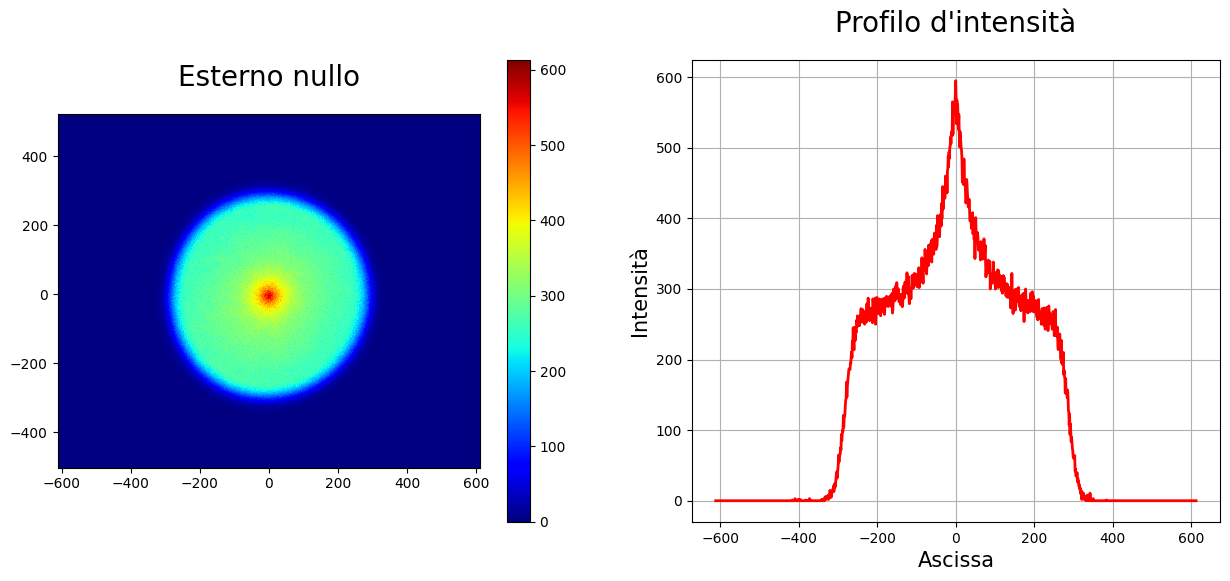

In [10]:
fig = plt.figure(figsize=(15, 6))

x = np.linspace(-col/2, col/2, col)
y = np.linspace(-row/2 + 10, row/2 + 10, row)

X, Y = np.meshgrid(x, y)

#-------------------------------------------------------------#
#              Immagine di plasma: esterno nullo              #
#-------------------------------------------------------------# 
ax = fig.add_subplot(1, 2, 1)
plasma = np.array(Image.open("Dati/CAMimages/plasma/plasma001.tif"))
plasma = plasma - mean_noise

mask = plasma < 0
plasma[mask] = 0

mask = (X*X + Y*Y) > pow(419, 2)
plasma[mask] = 0

mask = ((X*X + Y*Y) < pow(419, 2)) & ((X*X + Y*Y) > pow(320, 2))
appo = np.mean(plasma[mask])

mask = (X*X + Y*Y) < pow(419, 2)
plasma[mask] = plasma[mask] - appo

mask = plasma < 0
plasma[mask] = 0


# Faccio plot
cax = ax.pcolormesh(X, Y, plasma, cmap='jet')
plt.colorbar(cax); ax.set_aspect('equal')
ax.set_title(f'Esterno nullo', fontsize = 20, pad=20)


#-------------------------------------------------------------#
#                      Profilo d'intensità                    #
#-------------------------------------------------------------# 
ax = fig.add_subplot(1, 2, 2)
plasma = plasma.reshape(1024, 1224)
prof = plasma[502,:]

ax.plot(x, prof, color = 'r', linestyle = '-',linewidth = 2)
ax.set_xlabel("Ascissa", fontsize = 15); ax.set_ylabel("Intensità", fontsize = 15); ax.grid(True)
ax.set_title(f"Profilo d'intensità", fontsize = 20, pad=20)

plt.show()

del x, y, X, Y
del prof, plasma, appo, mean_noise

<center>

### Funzioni per automatizzare la pulizia

</center>

In [11]:
# Function to compute mean noise
def mean_noise(base, num_im):
    appo = 0
    m_noise = 0

    for i in range(1, num_im + 1):
        path = base + "{:03d}".format(i) + ".tif"
        m_noise = m_noise * i/(i+1) + np.array(Image.open(path))/(i+1)

    del appo
    return m_noise


# Function to set outside pixel to zero
def est_nullo(plasma, mean_noise, radius, xcen, ycen):
    x = np.linspace(-xcen, col - xcen, col)
    y = np.linspace(-ycen, row - ycen, row)

    # Creating mash grid to check wether we are in trap or not
    X, Y = np.meshgrid(x, y)
    
    plasma = plasma - mean_noise

    mask = plasma < 0
    plasma[mask] = 0

    mask = (X*X + Y*Y) > pow(radius, 2)
    plasma[mask] = 0

    del mask, x, y, X, Y
    return plasma


# Function to reduce additional noise
def no_rifl(plasma, r_pl, r_trap, xcen, ycen):
    x = np.linspace(-xcen, col - xcen, col)
    y = np.linspace(-ycen, row - ycen, row)

    X, Y = np.meshgrid(x, y)

    mask = ((X*X + Y*Y) < pow(r_trap, 2)) & ((X*X + Y*Y) > pow(r_pl, 2))
    appo = np.mean(plasma[mask])

    mask = (X*X + Y*Y) < pow(r_trap, 2)
    plasma[mask] = plasma[mask] - appo

    mask = plasma < 0
    plasma[mask] = 0
    
    del x, y, X, Y, appo, mask
    return plasma


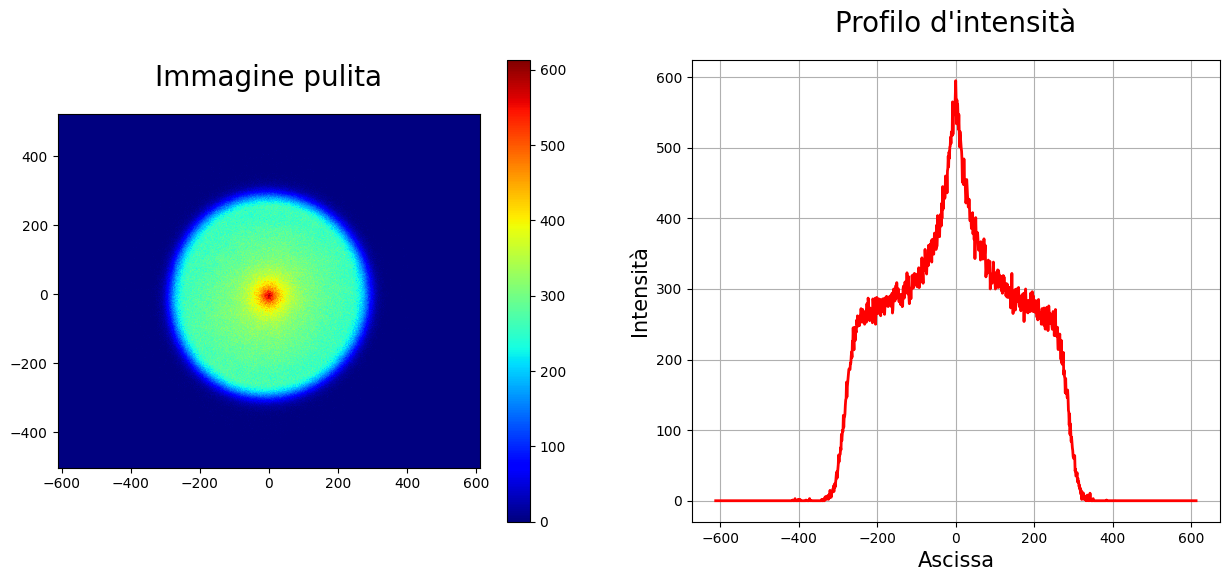

In [13]:
#--------------------------------------------------#
#     Testo i metodi --> prima fase di pulizia     #
#--------------------------------------------------#
xcen = 612; ycen = 502; r_pl = 320; rtrap = 419

rum_med = mean_noise("Dati/CAMimages/dark2x2/dark", 80) 

plasma = np.array(Image.open("Dati/CAMimages/plasma/plasma001.tif"))
plasma = plasma.reshape(1024, 1224)

plasma = est_nullo(plasma, rum_med, rtrap, xcen, ycen)
plasma = no_rifl(plasma, r_pl, rtrap, xcen, ycen)



#--------------------------------------------------------------#
#     Testo i metodi --> output per visualizzare risultati     #
#--------------------------------------------------------------#

fig = plt.figure(figsize=(15, 6))

x = np.linspace(-xcen, col - xcen, col)
y = np.linspace(-ycen, row - ycen, row)

X, Y = np.meshgrid(x, y)

#-------------------------------------------------------------#
#              Immagine di plasma: esterno nullo              #
#-------------------------------------------------------------# 
ax = fig.add_subplot(1, 2, 1)

cax = ax.pcolormesh(X, Y, plasma, cmap='jet')
plt.colorbar(cax); ax.set_aspect('equal')
ax.set_title(f'Immagine pulita', fontsize = 20, pad = 20)


#-------------------------------------------------------------#
#                      Profilo d'intensità                    #
#-------------------------------------------------------------# 
ax = fig.add_subplot(1, 2, 2); prof = plasma[502,:]

ax.plot(x, prof, color = 'r', linestyle = '-',linewidth = 2)
ax.set_xlabel("Ascissa", fontsize = 15); ax.set_ylabel("Intensità", fontsize = 15); ax.grid(True)
ax.set_title(f"Profilo d'intensità", fontsize = 20, pad = 20)

plt.show()

del x, y, X, Y
del prof, plasma, rum_med
del xcen, ycen, r_pl, rtrap

<center>

### Stampo immagini pulite

</center>

In [26]:
#--------------------------------------------------#
#     Testo i metodi --> prima fase di pulizia     #
#--------------------------------------------------#
rum_med = mean_noise("Dati/CAMimages/dark2x2/dark", 80) 
xcen = 612; ycen = 502; r_pl = 320; rtrap = 419

conta = 1
for i in range(1, 34):

    # Here we have a corrupted image: we need to check in order not to use her
    if i != 7:
        path = "Dati/CAMimages/plasma/plasma" + "{:03d}".format(i) + ".tif"

        plasma = np.array(Image.open(path))
        plasma = plasma.reshape(1024, 1224)

        plasma = est_nullo(plasma, rum_med, rtrap, xcen, ycen)
        plasma = no_rifl(plasma, r_pl, rtrap, xcen, ycen)

        # Salvo l'immagine
        path = "Dati/CAMimages/plasma_pulite/plasma" + "{:03d}".format(conta) + ".tif"

        image = Image.fromarray(plasma)
        image.save(path)
        conta += 1

del rum_med, plasma, image, conta
del xcen, ycen, r_pl, rtrap, path

<center>

### Intensità media

</center>

In [6]:
int_media = 0

for i in range(1, 33):
    path = "Dati/CAMimages/plasma_pulite/plasma" + "{:03d}".format(i) + ".tif"
    plasma = np.array(Image.open(path))
    plasma = plasma.reshape(1024, 1224)

    int_media = int_media * (i-1)/i + sum(sum(plasma))/i

del path, plasma
print("L'intensità media delle immagini di plasma è: ", int(int_media))

L'intensità media delle immagini di plasma è:  73552183


<div style="text-align: center;">
    <span style="color: blue; font-size: 50px;"> Studio della scarica </span>
</div>

In [ ]:
def moving_av(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def exp_func(x, a, b):
    return a * np.exp(b * x)

<center>

# Scarica elettronica

</center>

<center>
    
### Visualizzazione della scarica

</center>

In [ ]:
filename = 'Dati/Signals/electron_discharge/rcdisch/rcdisch/rcdisch_01.txt'

# Lettura del file saltando le prime tre righe e specificando le colonne
data = pd.read_csv(filename, delim_whitespace=True, skiprows=3, header=None)

# Assegnazione delle colonne a t e v
t = data[0].astype(float)
v = data[1].astype(float)
v_off = np.mean(v[:30000])
v = v - v_off

v_smooth = moving_av(v, window_size = 100)
t = t[:len(v_smooth)]

In [ ]:
# Fit esponenziale
popt, pcov = curve_fit(exp_func, t[40000:60000], v_smooth[40000:60000])
a, b = popt

print(f"Parametri ottimali: a = {a}, b = {b}")

t_fit = t[40000:60000]
v_fit = exp_func(t_fit, a, b)

Parametri ottimali: a = -6.439753656129757, b = -2.0890467111169064


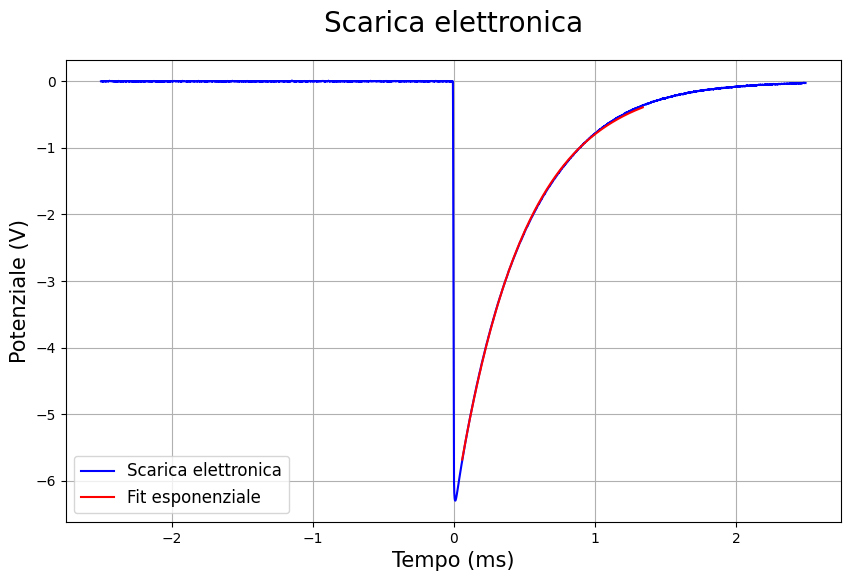

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.plot(t, v_smooth, 'b-', label = 'Scarica elettronica')
plt.plot(t_fit, v_fit, 'r-', label='Fit esponenziale')
plt.xlabel('Tempo (ms)', fontsize = 15)
plt.ylabel('Potenziale (V)', fontsize = 15)
plt.title('Scarica elettronica', fontsize = 20, pad = 20)
plt.grid(True)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
del t, t_fit, v, v_smooth, v_fit, a, b, v_off 

<center>

# Scarica ionica

</center>

<center>

### Visualizzazione della scarica

</center>

In [ ]:
filename = 'Dati/Signals/ion_discharge/cdisch/cdisch_01.txt'

# Lettura del file saltando le prime tre righe e specificando le colonne
data = pd.read_csv(filename, delim_whitespace=True, skiprows=3, header=None)

# Assegnazione delle colonne a t e v
t = data[0].astype(float)
v = data[1].astype(float)

v_off = np.mean(v[:30000])
v = v - v_off

v_smooth = moving_av(v, window_size = 100)
t = t[:len(v_smooth)]

In [ ]:
# Fit esponenziale
t_fit = t[41000:60000]
popt, pcov = curve_fit(exp_func, t_fit, v_smooth[41000:60000])
a, b = popt

print(f"Parametri ottimali: a = {a}, b = {b}")


v_fit = exp_func(t_fit, a, b)

Parametri ottimali: a = 34.85012819229448, b = -2.3570912139974207


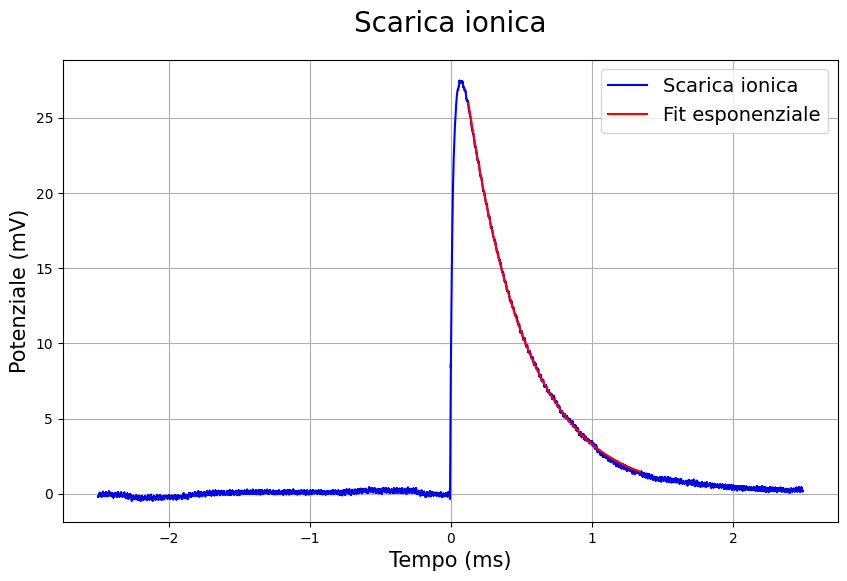

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.plot(t, v_smooth, 'b-', label = 'Scarica ionica')
plt.plot(t_fit, v_fit, 'r-', label='Fit esponenziale')
plt.xlabel('Tempo (ms)', fontsize = 15)
plt.ylabel('Potenziale (mV)', fontsize = 15)
plt.title('Scarica ionica', fontsize = 20 ,pad = 20)
plt.grid(True)
plt.legend(fontsize = 14)
plt.show()

In [ ]:
del t, t_fit, v, v_smooth, v_fit, a, b, v_off 